# Business Understanding

Het jaarlijkse energieverbruik door Nederlanders blijft maar toenemen, ondanks alle bezuinigende maatregelen die we treffen als volk. Het toenemende energiegebruik is mede verantwoordelijk voor de wereldwijde klimaatveranderingen. De gemiddelde temperatuur over de afgelopen eeuw is gestegen, de hoeveelheid en intensiteit van neerslag zijn toegenomen en zeer warme dagen komen steeds vaker voor. Het realiseren van de klimaatdoelen van Parijs is nodig om verdere opwarming van de aarde en de gevolgen daarvan zo veel mogelijk te voorkomen. Om aan de afspraken van Parijs te voldoen moet Nederland overstappen van fossiele brandstoffen op duurzame energiebronnen zoals zon en wind. Het is daarom belangrijker dan ooit om na te denken over nieuwe manieren van energie opwekken en het indammen van energieverspilling. 

Enexis, Liander en Stedin zijn de drie grote netwerkbeheerders van Nederland en leveren samen energie aan bijna het hele land. Elk jaar publiceren deze bedrijven een tabel met het energieverbruik van de gebieden die onder hun beheer vallen, op hun websites. 
Welke inzichten kunnen uit deze Nederlandse verbruiksdata gegenereerd worden? En hoe kunnen we deze inzichten toepassen om een bijdrage te kunnen leveren aan de innovatie op het gebied van energieopwekking en het tegengaan van energieverspilling? 

Het doel van deze challenge is om inzichten te creëren die wellicht kunnen bijdragen aan de innovatie op het gebied van energieopwekking en het tegengaan van energieverspilling. Om niet verdwaald te raken in alle mogelijkheden die deze datasets bieden, zijn er van te voren een aantal hoofdvragen opgesteld. Deze hoofdvragen kunnen later nog worden opgesplitst in deelvragen.
Als we kijken naar de data die beschikbaar is, kunnen we een aantal vragen bedenken die wellicht met behulp van data science kunnen worden opgelost. Deze vragen zijn als volgt:
- Welke regio’s zijn de grootgebruikers van het land en waar ligt dit aan?
- Kunnen we het gas- en/of energieverbruik van het/de aankomende jaar/jaren voorspellen en zo ja, wat vertelt deze voorspelling ons?
- Kunnen we achterhalen wat voor type gebruiker (bijv. een winkel of huis) de meeste energie verspilt en zo ja, hier een oplossing voor bedenken?


# Data Understanding

De data bestaat zowel uit gasverbruik als energieverbruik. In de data worden een aantal kolommen gebruikt die hieronder toegelicht worden:

| **Kolomnaam** | **Toelichting** | **Voorbeeld** |
| --- | --- | --- |
| net\_manager | Welk bedrijf het netwerk onderhoud. | Enexis B.V. |
| purchase\_area | Bij welk bedrijf de elektriciteit en gas gekocht wordt. | ENEXIS |
| street | Over welke straat de data gaat. | Sasdijk |
| zipcode\_from | Deze vormt samen met zipcode\_to een range over welke postcodes de data gaat. | 4251AB |
| zipcode\_to | Deze vormt samen met zipcode\_from een range over welke postcodes de data gaat. Deze is gelijk aan zipcode\_from als het postcodegebied meer dan 9 aansluitingen heeft. | 4251AB |
| city | Uit welke stad de data komt. | WERKENDAM |
| num\_connections | De hoeveelheid aansluitingen die binnen de range zijn van de postcodes. | 16 |
| delivery\_perc | Welk percentage van het stroomverbruik geleverd is door de energieleverancier. Wanneer een locatie bijvoorbeeld zonnepanelen heeft is dit percentage lager. | 100 |
| perc\_of\_active\_connections | Welk percentage van de aansluitingen actief zijn. | 100 |
| type\_conn\_perc | Welk percentage van de aansluitingen bestaat uit het type van type\_if\_connection. | 50 |
| type\_of\_connection | Welk soort aansluiting er aanwezig is. Voor elektriciteit is dit #zekeringen X #ampère. Voor gas is G4, G6, G10, G16 en G25. Deze aansluitingen hebben verschillende doorlaat waardes, G6 10m3 per uur door. | Gas: G6Elektriciteit: 1X25 |
| annual\_consume | Jaarlijks gebruik in kWh voor elektriciteit of voor gas in m3 | elektriciteit:4961gas:3215 |
| annual\_consume\_lowtarif\_perc | Welk percentage van het verbruikt tijdens laag tarief is(tussen 22:00 en 07:00 en in het weekend) | 25 |
| smartmeter\_perc | percentage gebruik smartmeter (alle generaties) | 0 |

In [34]:
import pandas as pd
import glob
gasPath = 'datasets\Gas'
elecPath = 'datasets\Electricity'

## Stedin Gas

In [35]:
stedin_gas = glob.glob(gasPath + "/stedin_*.csv")
li = []  #waarom variabele li? (naarmate ik hier langer mee bezig was bedacht ik me dat het mogelijk voor list staat?)

for filename in stedin_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

stedinFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(stedinFrame.info())
print(stedinFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934948 entries, 0 to 934947
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   934948 non-null  int64  
 1   purchase_area                 934947 non-null  object 
 2   street                        934948 non-null  object 
 3   zipcode_from                  934948 non-null  object 
 4   zipcode_to                    934948 non-null  object 
 5   city                          934948 non-null  object 
 6   num_connections               934948 non-null  int64  
 7   delivery_perc                 934948 non-null  float64
 8   perc_of_active_connections    934948 non-null  float64
 9   type_conn_perc                934948 non-null  float64
 10  type_of_connection            934948 non-null  object 
 11  annual_consume                934948 non-null  int64  
 12  annual_consume_lowtarif_perc  934948 non-nul

## Stedin Elektriciteit

In [36]:
stedin_elec = glob.glob(elecPath + "/stedin_*.csv")
li = []

for filename in stedin_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

stedin_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(stedin_Elec_Frame.info())
print(stedin_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913096 entries, 0 to 913095
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   913096 non-null  int64  
 1   purchase_area                 913096 non-null  object 
 2   street                        913096 non-null  object 
 3   zipcode_from                  913096 non-null  object 
 4   zipcode_to                    913096 non-null  object 
 5   city                          913096 non-null  object 
 6   num_connections               913096 non-null  int64  
 7   delivery_perc                 913096 non-null  float64
 8   perc_of_active_connections    913096 non-null  float64
 9   type_conn_perc                913096 non-null  float64
 10  type_of_connection            913096 non-null  object 
 11  annual_consume                913096 non-null  int64  
 12  annual_consume_lowtarif_perc  913096 non-nul

## Liander Gas

In [37]:
liander_gas = glob.glob(gasPath + "/liander_*.csv") 

li = []

for filename in liander_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

lianderFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(lianderFrame.info())
print(lianderFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200607 entries, 0 to 1200606
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   net_manager                   1200607 non-null  object 
 1   purchase_area                 964673 non-null   object 
 2   street                        1200607 non-null  object 
 3   zipcode_from                  1200607 non-null  object 
 4   zipcode_to                    1200607 non-null  object 
 5   city                          1200607 non-null  object 
 6   num_connections               1200607 non-null  float64
 7   delivery_perc                 1200607 non-null  float64
 8   perc_of_active_connections    1200607 non-null  float64
 9   type_conn_perc                1200607 non-null  float64
 10  type_of_connection            1200607 non-null  object 
 11  annual_consume                1200607 non-null  float64
 12  annual_consume_lowtarif_perc

## Liander Elektriciteit

In [38]:
liander_elec = glob.glob(elecPath + "/liander_*.csv")
li = []

for filename in liander_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

liander_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(liander_Elec_Frame.info())
print(liander_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511295 entries, 0 to 1511294
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   net_manager                   1511295 non-null  object 
 1   purchase_area                 624638 non-null   object 
 2   street                        1511295 non-null  object 
 3   zipcode_from                  1511295 non-null  object 
 4   zipcode_to                    1511295 non-null  object 
 5   city                          1511295 non-null  object 
 6   num_connections               1511295 non-null  float64
 7   delivery_perc                 1511295 non-null  float64
 8   perc_of_active_connections    1511295 non-null  float64
 9   type_conn_perc                1511295 non-null  float64
 10  type_of_connection            1511295 non-null  object 
 11  annual_consume                1511295 non-null  float64
 12  annual_consume_lowtarif_perc

## Enexis Gas

In [39]:
enexis_gas = glob.glob(gasPath + "/enexis_*.csv")
li = []

for filename in enexis_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

enexisFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(enexisFrame.info())
print(enexisFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950202 entries, 0 to 950201
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   950202 non-null  object 
 1   purchase_area                 950202 non-null  object 
 2   street                        950202 non-null  object 
 3   zipcode_from                  950202 non-null  object 
 4   zipcode_to                    950202 non-null  object 
 5   city                          950202 non-null  object 
 6   delivery_perc                 950202 non-null  float64
 7   num_connections               950202 non-null  int64  
 8   perc_of_active_connections    950202 non-null  int64  
 9   type_conn_perc                867236 non-null  float64
 10  type_of_connection            867236 non-null  object 
 11  annual_consume                950202 non-null  float64
 12  annual_consume_lowtarif_perc  950202 non-nul

## Enexis Elektriciteit

In [40]:
enexis_elec = glob.glob(elecPath + "/enexis_*.csv")
li = []

for filename in enexis_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

enexis_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(enexis_Elec_Frame.info())
print(enexis_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141402 entries, 0 to 1141401
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   net_manager                   1141402 non-null  object 
 1   purchase_area                 1141402 non-null  object 
 2   street                        1141402 non-null  object 
 3   zipcode_from                  1141402 non-null  object 
 4   zipcode_to                    1141402 non-null  object 
 5   city                          1141402 non-null  object 
 6   delivery_perc                 1140820 non-null  float64
 7   num_connections               1141402 non-null  int64  
 8   perc_of_active_connections    1141402 non-null  int64  
 9   type_conn_perc                1033890 non-null  float64
 10  type_of_connection            1033821 non-null  object 
 11  annual_consume                1141402 non-null  float64
 12  annual_consume_lowtarif_perc

In [41]:
gasFrame = pd.concat([stedinFrame, lianderFrame, enexisFrame], sort=True)
print(gasFrame.info())
print(gasFrame.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3085757 entries, 0 to 950201
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   annual_consume                float64
 1   annual_consume_lowtarif_perc  float64
 2   city                          object 
 3   delivery_perc                 float64
 4   net_manager                   object 
 5   num_connections               float64
 6   perc_of_active_connections    float64
 7   purchase_area                 object 
 8   smartmeter_perc               float64
 9   street                        object 
 10  type_conn_perc                float64
 11  type_of_connection            object 
 12  year                          object 
 13  zipcode_from                  object 
 14  zipcode_to                    object 
dtypes: float64(7), object(8)
memory usage: 376.7+ MB
None
   annual_consume  annual_consume_lowtarif_perc          city  delivery_perc  \
0          2611.0 

In [42]:
uniqueCities = gasFrame.set_index('city').index.unique().sort_values()
print(len(uniqueCities))
print(uniqueCities)

# We see that not all cities are written the same way. i.e. 'S-GRAVENHAGE, 'S GRAVENHAGE, S- GRAVENHAGE, S-GRAVENHAGE etc.

2219
Index([''S GRAVENDEEL', ''S GRAVENHAGE', ''S GRAVENMOER', ''S-GRAVELAND',
       ''S-GRAVENDEEL', ''S-GRAVENHAGE', ''S-HEERENBERG', ''S-HEERENBROEK',
       ''S-HERTOGENBOSCH', ''T GOY',
       ...
       'ZWANENBURG', 'ZWARTEBROEK', 'ZWARTEMEER', 'ZWARTEWAAL', 'ZWEELOO',
       'ZWEINS', 'ZWIGGELTE', 'ZWIJNDRECHT', 'ZWOLLE', '\'T LOO OLDEBROEK'],
      dtype='object', name='city', length=2219)


# Data Preparation

### Gas

In [43]:
gasFrame.loc[gasFrame['city'].str.startswith('\'S-'), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('\'S-'), 'city'].str.replace('\'S-', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('S-'), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('S-'), 'city'].str.replace('S-', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('\'S- '), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('\'S- '), 'city'].str.replace('\'S- ', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('S '), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('S '), 'city'].str.replace('S ', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('\'S '), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('\'S '), 'city'].str.replace('\'S ', 'S-')

print(gasFrame.loc[gasFrame['city'].str.contains('\'S GRAVENHAGE')])

Empty DataFrame
Columns: [annual_consume, annual_consume_lowtarif_perc, city, delivery_perc, net_manager, num_connections, perc_of_active_connections, purchase_area, smartmeter_perc, street, type_conn_perc, type_of_connection, year, zipcode_from, zipcode_to]
Index: []


In [44]:
cleanedUniqueCities = gasFrame.set_index('city').index.unique().sort_values()
print(len(cleanedUniqueCities))
print(cleanedUniqueCities)

2216
Index([''T GOY', ''T HAANTJE', ''T HARDE', ''T LOO OLDEBROEK', ''T VELD',
       ''T WAAR', ''T ZAND NH', ''T ZANDT GN', '1E EXLOERMOND',
       '2E EXLOERMOND',
       ...
       'ZWANENBURG', 'ZWARTEBROEK', 'ZWARTEMEER', 'ZWARTEWAAL', 'ZWEELOO',
       'ZWEINS', 'ZWIGGELTE', 'ZWIJNDRECHT', 'ZWOLLE', '\'T LOO OLDEBROEK'],
      dtype='object', name='city', length=2216)


### Elektriciteit

In [45]:
elecFrame = pd.concat([stedin_Elec_Frame.drop(0), liander_Elec_Frame.drop(0), enexis_Elec_Frame.drop(0)], sort=False) 
# zonder drop blijven de indexes van de originele dataframes er in staan, dit resulteert er in dat er 3 dataframes met index 0 voorkomen

print(elecFrame.info())
elecFrame.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565790 entries, 1 to 1141401
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   net_manager                   object 
 1   purchase_area                 object 
 2   street                        object 
 3   zipcode_from                  object 
 4   zipcode_to                    object 
 5   city                          object 
 6   num_connections               float64
 7   delivery_perc                 float64
 8   perc_of_active_connections    float64
 9   type_conn_perc                float64
 10  type_of_connection            object 
 11  annual_consume                float64
 12  annual_consume_lowtarif_perc  float64
 13  smartmeter_perc               float64
 14  year                          object 
dtypes: float64(7), object(8)
memory usage: 435.3+ MB
None


,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17.0,100.0,100.0,41.0,1x25,3467.0,76.47,0.00,2009
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17.0,100.0,100.0,41.0,3x25,3880.0,64.71,0.00,2009
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20.0,100.0,100.0,45.0,1x25,4699.0,85.00,0.00,2009
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17.0,100.0,100.0,71.0,1x25,4039.0,64.71,0.00,2009
5,8716874000009,Stedin Utrecht,Paulus Potterlaan,1231AH,1231AH,LOOSDRECHT,22.0,100.0,100.0,41.0,3x25,3991.0,86.36,4.55,2009


# Modeling

## Melissa

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

2216


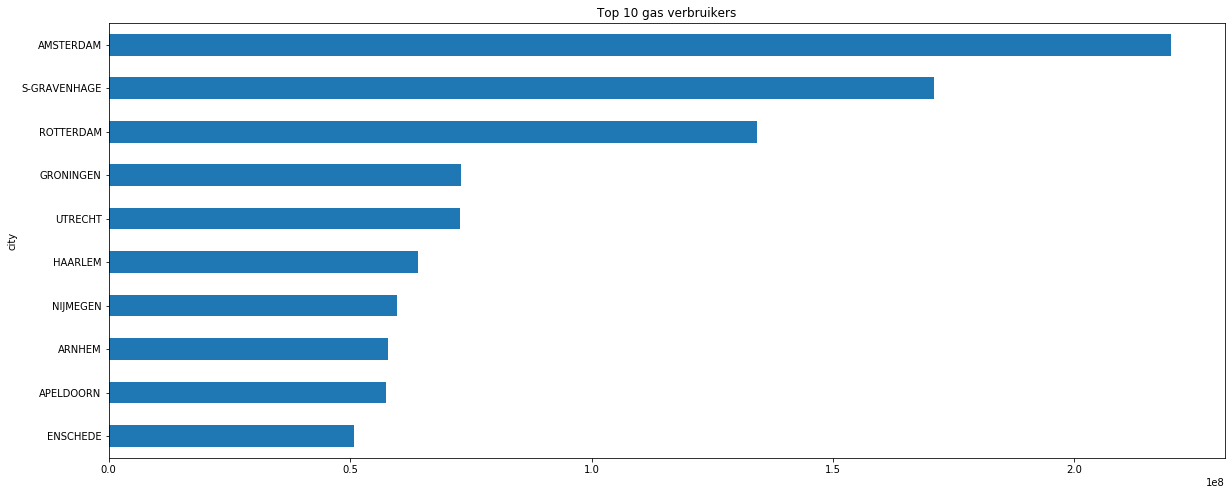

In [47]:
totalConsumePerCity = gasFrame.groupby(['city'])['annual_consume'].sum().sort_values(ascending=False)
print(totalConsumePerCity.count())

fig, ax = plt.subplots(1,1, figsize=(20, 8))
totalConsumePerCity.head(10).sort_values().plot(kind='barh', title='Top 10 gas verbruikers')
plt.show()



In [48]:
sortedCities = gasFrame.groupby(['city', 'year'])[['annual_consume','year']].sum().sort_values(['annual_consume', 'year'], ascending=[False, False])
top3 = sortedCities.loc[['AMSTERDAM', 'S-GRAVENHAGE', 'ROTTERDAM']]

# print(top3)
top3 = top3.reset_index()

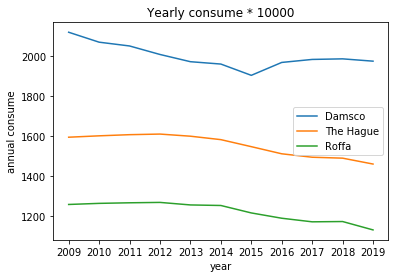

In [49]:
top3 = top3.sort_values(['city', 'year'])

x1 = top3[top3['city'] == 'AMSTERDAM']['year']
y1 = top3[top3['city'] == 'AMSTERDAM']['annual_consume']/10000
plt.plot(x1, y1, label = "Damsco")

x2 = top3[top3['city'] == 'S-GRAVENHAGE']['year']
y2 = top3[top3['city'] == 'S-GRAVENHAGE']['annual_consume']/10000
plt.plot(x2, y2, label = "The Hague")

x3 = top3[top3['city'] == 'ROTTERDAM']['year']
y3 = top3[top3['city'] == 'ROTTERDAM']['annual_consume']/10000
plt.plot(x3, y3, label = "Roffa")

plt.title('Yearly consume * 10000')
plt.xlabel('year')
plt.ylabel('annual consume')

plt.legend()
plt.show()

## Joppe

         annual use  # households  average use
2009   97783.836200        214167  4565.775129
2010  151664.251100        323139  4693.467861
2011  152521.313000        325219  4689.803271
2012  154323.431200        327989  4705.140453
2013  154687.333100        331975  4659.607895
2014  153084.688300        332385  4605.643705
2015  148446.935000        333615  4449.648097
2016  146126.587400        335007  4361.896539
2017  145989.905900        341250  4278.092481
2018  150845.282884        351123  4296.080943
2019  146564.089577        349921  4188.490819


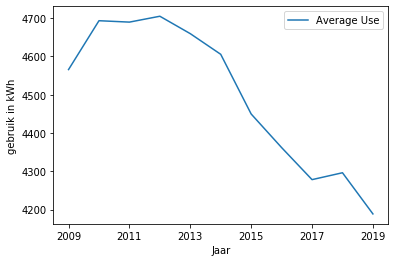

In [51]:
#fig, ax = plt.subplots(figsize=(15,7))
#annual_Consume_Elec = elecFrame.groupby('year').count()['annual_consume'].plot(ax=ax)
#plt.show()


#elecFrame["annual_consume"].sum(axis=0).where(elecFrame["year"] == "2010", 0)
#df['total'] = elecFrame.loc[elecFrame['year'] == 2010,['annual_consume']].sum(axis=0)

years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

cons_year = []
households_year = []
avg_cons = []
for i in years:
    sum_ann = elecFrame["annual_consume"].where(elecFrame['year'] == i).sum()
    sum_ann_div = sum_ann/10000
    households = elecFrame["year"].where(elecFrame["year"] == i).count()
    avg = sum_ann/households
    cons_year.append(sum_ann_div)
    households_year.append(households)
    avg_cons.append(avg)


data = zip(cons_year, households_year, avg_cons)
annual_use = pd.DataFrame(list(data), index = years, columns = ["annual use", "# households", "average use"])
#annual_use_electricity = pd.DataFrame(cons_year, index = years, columns = ["annual use"])
print(annual_use)
#annual_use.plot()
avg_use = pd.DataFrame(avg_cons, index = years, columns = ["Average Use"])
avg_use_plot = avg_use.plot()
avg_use_plot.set_ylabel("gebruik in kWh")
avg_use_plot.set_xlabel("Jaar")
plt.show()

## Rixte

2216


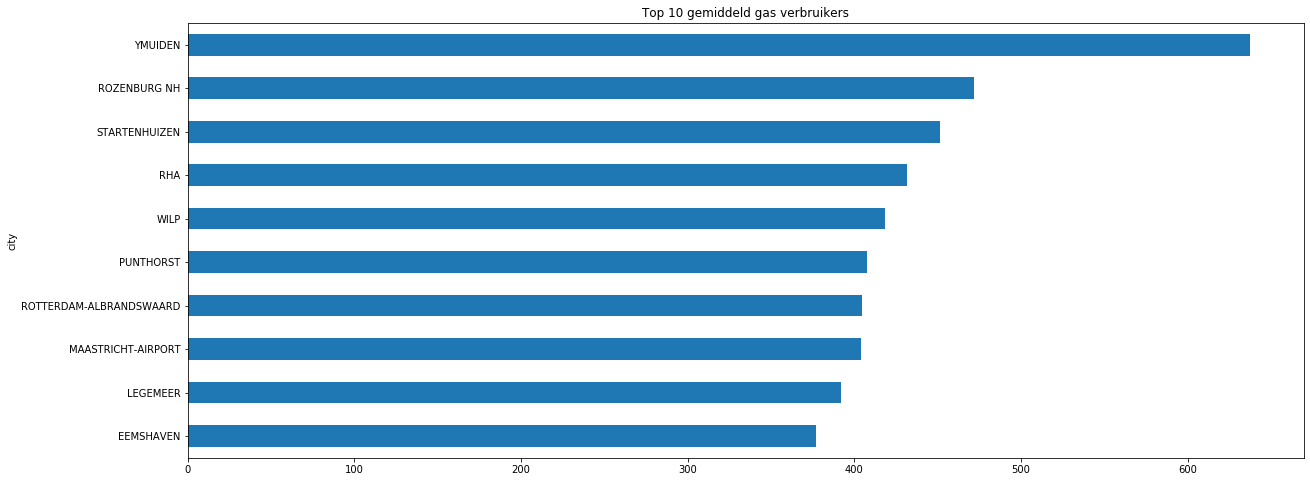

In [53]:
gasFrame["active_conections"] = round(gasFrame["num_connections"]*gasFrame["perc_of_active_connections"]/100) #calculate number of active connections
gasFrame["average_consume"] = gasFrame['annual_consume']/gasFrame["active_conections"] #calcuate average cunsumption per active connection
gasFrame["average_consume"] = gasFrame["average_consume"].replace({float('inf'):0}) #replace all divide by 0 problems

averageConsumePerCity = gasFrame.groupby(['city'])['average_consume'].mean().sort_values(ascending=False)
print(averageConsumePerCity.count())

fig, ax = plt.subplots(1,1, figsize=(20, 8))
averageConsumePerCity.head(10).sort_values().plot(kind='barh', title='Top 10 gemiddeld gas verbruikers')
plt.show()

ik heb in dit plot uitgerekend wat de gemiddelde consumptie per actieve aansluiting per jaar is daaruit blijkt dat drachten met kop en schouders boven de rest uitsteekt (ik ben er later achter gekomen dat er een fout in mijn dataset zat daarom zie je dit hier nu niet terug)

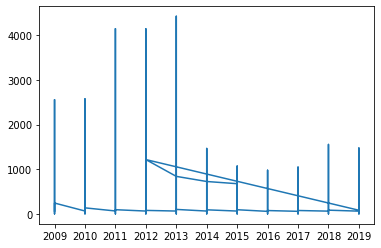

In [54]:
singleCity = gasFrame.loc[gasFrame["city"] == "DRACHTEN"]
x1 = singleCity["year"]
y1 = singleCity["average_consume"]
plt.plot(x1, y1, label = "Drachten")
plt.show()

in deze grafiek ging ik kijken hoe het gasverbruik over de jaren veranderd is in drachten en het blijkt behoorlijk verbeterd te zijn hoewel het nog steeds aan de hoge kant is. dit gaf me het idee per stad te kijken hoeveel dit verbeterd is ()

In [ ]:
uniqueCities = gasFrame.set_index('city').index.unique()
data = []
for city in uniqueCities:
    singleCity = gasFrame.loc[gasFrame["city"] == city]
    earliestYear = min(singleCity["year"])
    latestYear = max(singleCity["year"])
    
    firstYear = singleCity.loc[singleCity["year"] == earliestYear]
    earliestAverage = sum(firstYear["average_consume"])/firstYear["average_consume"].count()
    lastYear = singleCity.loc[singleCity["year"] == latestYear]
    latestAverage = sum(lastYear["average_consume"])/lastYear["average_consume"].count()
    
    data += [[city,earliestYear,earliestAverage,latestYear,latestAverage]]
    
df = pd.DataFrame(data, columns = ['City', 'earliestYear','earliestAverage','latestYear','latestAverage']) 
df["latestYear"] = pd.to_numeric(df["latestYear"])
df["earliestYear"] = pd.to_numeric(df["earliestYear"])

df["AverageDecreasePerYear"] = (df["earliestAverage"] - df["latestAverage"])/( df["latestYear"]- df["earliestYear"])

Decrease = df.groupby(['City'])["AverageDecreasePerYear"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(1,1, figsize=(20, 8))
Decrease.head(10).sort_values().plot(kind='barh')
plt.show()

print("aantal steden waar gemiddeld gasverbruik is gedaald: " + str(df.loc[df["AverageDecreasePerYear"] > 0]["City"].count()) )
print("aantal steden waar gemiddeld gasverbruik is gestegen: " + str(df.loc[df["AverageDecreasePerYear"] < 0]["City"].count()) )


In [ ]:
df["percentageDecreasePerYear"] = df["AverageDecreasePerYear"] / df["earliestAverage"]*100

DecreasePercentage = df.groupby(['City'])["percentageDecreasePerYear"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(1,1, figsize=(20, 8))
DecreasePercentage.head(10).sort_values().plot(kind='barh')
plt.show()


het gasverbruik in elst is afgenomen met bijna 90% dat is wel erg veel dus ik ga checken hoeveel data we van elst hebben

In [ ]:
singleCity = gasFrame.loc[gasFrame["city"] == "ELST"]
x1 = singleCity["year"]
y1 = singleCity["average_consume"]
plt.plot(x1, y1)
plt.show

print('we hebben maar twee jaar aan data van elst en niets recenters dan 2016 het zou dus kunnen dat de gasverbruik verlaging komt doordat elst is overgestapt op een ander bedrijf waar we geen data van hebben. ik ga dus proberen of ik alle steden waar we geen data uit 2019 van hebben eruit te filteren')

filter2019 = df.loc[df["latestYear"] == 2019]
filter2015 = filter2019.loc[filter2019["earliestYear"] < 2015]

print('besloot later om alle steden waarvan minder dan vijf jaar aan data is er ook uit te filteren')

DecreasePercentage = filter2015.groupby(['City'])["percentageDecreasePerYear"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(1,1, figsize=(20, 8))
DecreasePercentage.head(10).sort_values().plot(kind='barh')
plt.show()

print("aantal steden waar gemiddeld gasverbruik is gedaald: " + str(filter2015.loc[filter2015["AverageDecreasePerYear"] > 0]["City"].count()) )
print("aantal steden waar gemiddeld gasverbruik is gestegen: " + str(filter2015.loc[filter2015["AverageDecreasePerYear"] < 0]["City"].count()) )

print(sum(filter2015["AverageDecreasePerYear"])/filter2015["AverageDecreasePerYear"].count())



# Evaluation

## Melissa

De top 10 grootste gasverbruikende stede van NL zijn op volgorde: Amsterdam, Den Haag, Rotterdam, Groningen, Utrecht, Haarlem, Nijmegen, Arnhem, Apeldoor, Enscheden. Het zal niemand verbazen dat Amsterdam, Den Haag en Rotterdam de 3 grootste gasverbruikende steden zijn. Dit zijn namelijk in omvang al zeer grote steden. We zien dat het gasverbruik van Amsterdam de laatste 3 jaar, na een aantal jaar dalen, toch weer aan het stijgen is. Rotterdam en Den Haag zitten momenteel in een lichte daling. Toch wijst een linear regressie model uit, dat zij toch wel weer wat zullen stijgen. 

## Joppe

## Rixte

Uit de data blijkt dat het gemiddelde huishuiden in de afgelopen tien jaar zijn gasverbruik heeft gereduceerd met 1,4%. Deze data lijkt echter niet compleet te zijn dus het echte percentage zou hier vanaf kunnen wijken. Als je deze uitkomsten accuraat wilt krijgen zal er dus gekeken moeten worden naar of de ontbrekende data boven water gehaald kan worden. Deze analise zou verbeterd kunnen worden door te kijken naar de postcode clusters in plaats van alles samen te rapen in steden. Dit zou een gedeelte van de data die eruitgefilterd is bruikbaar maken en er zou een beter inzicht ontstaan over hoeveel van de toename an afname van gasverbruik te wijten is aan 

## Michael

## Jonell

## Stan

## Erhan

# Deployment